<a href="https://colab.research.google.com/github/Kaleab1999/Ethiopia-airlines-tweeter-review-sentiment-analysis/blob/main/bert_for_thesis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 25.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 23.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 94.4 MB/s eta 0:00:00


### importing Bert tokenizer and model

In [2]:
import pandas as pd
from transformers import BertTokenizer, BertForSequenceClassification
from transformers import Trainer, TrainingArguments

### loading dataset

In [3]:
df= pd.read_csv('/content/sentiment twitter dataset.csv', encoding = 'unicode_escape')
df.head()

,created_at,user_id,name,label,tweet,language,link,Column1
0,2022-10-28 23:15:24 UTC,4.386524e+08,AfricanSon®,negative,Ethiopian Airlines (EA) flight ET-3717 was int...,en,https://twitter.com/samsenge/status/1586134568...,NaN
1,2022-10-28 22:53:28 UTC,1.320000e+18,Bargo YOUSIF,negative,"_ details: It's #Ethiopian_Airlines flight, sm...",en,https://twitter.com/BargoYousif/status/1586129...,NaN
2,2022-10-28 22:21:31 UTC,8.226798e+08,Dr. Aklog Birara,positive,I look forward to seeing integrated infrastruc...,en,https://twitter.com/DrAklogBirara/status/15861...,NaN
3,2022-10-28 19:46:19 UTC,1.470000e+18,bill,negative,@jaeyoonieee me getting on ethiopian airlines ...,en,https://twitter.com/ysfkd_/status/158608195096...,NaN
4,2022-10-28 16:40:48 UTC,1.570000e+18,OverMeon,neutral,#ETH552 ET-AVE A350 941 Ethiopian Airlines ADD...,en,https://twitter.com/OverMeon/status/1586035262...,NaN


In [4]:
df['label'].value_counts()

neutral     2274
positive    1119
negative    1036
Name: label, dtype: int64

In [5]:
import seaborn as sns

import matplotlib.pyplot as plt

%matplotlib inline

### visualizing the distribution of label

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


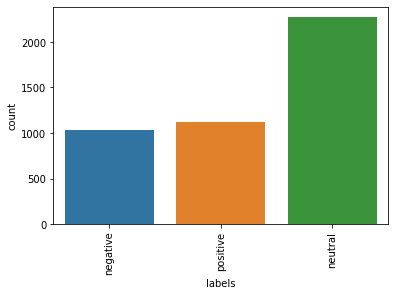

In [6]:
sns.countplot('label', data = df)
plt.xlabel('labels')
plt.ylabel('count')
plt.xticks(rotation=90)
plt.show()

### loading pretrained model

In [7]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained ("bert-base-uncased", num_labels=3)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

In [ ]:
!pip install text_hammer

In [9]:
import spacy
import re
import text_hammer as th
nlp=  spacy.load('en_core_web_sm')

### funcion to preprocess the text

In [14]:
df['tweet'] = df['tweet'].map(lambda x: x.lower())

In [20]:

def remove_punc_num(df, attribute):
    df.loc[:,attribute] = df[attribute].apply(lambda x : " ".join(re.findall('[\w]+',x)))
    df[attribute] = df[attribute].str.replace('\d+', '')
    return df
df =remove_punc_num(df, 'tweet')

<ipython-input-20-1d5ebc0819ba>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df[attribute] = df[attribute].str.replace('\d+', '')


In [21]:
df.head()

,created_at,user_id,name,label,tweet,language,link,Column1
0,2022-10-28 23:15:24 UTC,4.386524e+08,AfricanSon®,negative,ethiopian airlines ea flight et was intercept...,en,https://twitter.com/samsenge/status/1586134568...,NaN
1,2022-10-28 22:53:28 UTC,1.320000e+18,Bargo YOUSIF,negative,_ details it s ethiopian_airlines flight smoke...,en,https://twitter.com/BargoYousif/status/1586129...,NaN
2,2022-10-28 22:21:31 UTC,8.226798e+08,Dr. Aklog Birara,positive,i look forward to seeing integrated infrastruc...,en,https://twitter.com/DrAklogBirara/status/15861...,NaN
3,2022-10-28 19:46:19 UTC,1.470000e+18,bill,negative,jaeyoonieee me getting on ethiopian airlines a...,en,https://twitter.com/ysfkd_/status/158608195096...,NaN
4,2022-10-28 16:40:48 UTC,1.570000e+18,OverMeon,neutral,eth et ave a ethiopian airlines add dub bole ...,en,https://twitter.com/OverMeon/status/1586035262...,NaN


In [22]:
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords
from wordcloud import WordCloud
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer

In [24]:
tk =WhitespaceTokenizer()
def tokenise(df, attribute):
    df['tokenised'] = df.apply(lambda row: tk.tokenize(str(row[attribute])), axis=1)
    return df
df =tokenise(df, 'tweet')

In [25]:
df.head()

,created_at,user_id,name,label,tweet,language,link,Column1,tokenised
0,2022-10-28 23:15:24 UTC,4.386524e+08,AfricanSon®,negative,ethiopian airlines ea flight et was intercept...,en,https://twitter.com/samsenge/status/1586134568...,NaN,"[ethiopian, airlines, ea, flight, et, was, int..."
1,2022-10-28 22:53:28 UTC,1.320000e+18,Bargo YOUSIF,negative,_ details it s ethiopian_airlines flight smoke...,en,https://twitter.com/BargoYousif/status/1586129...,NaN,"[_, details, it, s, ethiopian_airlines, flight..."
2,2022-10-28 22:21:31 UTC,8.226798e+08,Dr. Aklog Birara,positive,i look forward to seeing integrated infrastruc...,en,https://twitter.com/DrAklogBirara/status/15861...,NaN,"[i, look, forward, to, seeing, integrated, inf..."
3,2022-10-28 19:46:19 UTC,1.470000e+18,bill,negative,jaeyoonieee me getting on ethiopian airlines a...,en,https://twitter.com/ysfkd_/status/158608195096...,NaN,"[jaeyoonieee, me, getting, on, ethiopian, airl..."
4,2022-10-28 16:40:48 UTC,1.570000e+18,OverMeon,neutral,eth et ave a ethiopian airlines add dub bole ...,en,https://twitter.com/OverMeon/status/1586035262...,NaN,"[eth, et, ave, a, ethiopian, airlines, add, du..."


In [27]:
from nltk.stem.snowball import SnowballStemmer
def stemming(df, attribute):
    # Use English stemmer.
    stemmer = SnowballStemmer("english")
    df['stemmed'] = df[attribute].apply(lambda x: [stemmer.stem(y) for y in x]) # Stem every word.
    return df
df =stemming(df, 'tokenised')
df.head(2)

,created_at,user_id,name,label,tweet,language,link,Column1,tokenised,stemmed
0,2022-10-28 23:15:24 UTC,4.386524e+08,AfricanSon®,negative,ethiopian airlines ea flight et was intercept...,en,https://twitter.com/samsenge/status/1586134568...,NaN,"[ethiopian, airlines, ea, flight, et, was, int...","[ethiopian, airlin, ea, flight, et, was, inter..."
1,2022-10-28 22:53:28 UTC,1.320000e+18,Bargo YOUSIF,negative,_ details it s ethiopian_airlines flight smoke...,en,https://twitter.com/BargoYousif/status/1586129...,NaN,"[_, details, it, s, ethiopian_airlines, flight...","[_, detail, it, s, ethiopian_airlin, flight, s..."


In [29]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
special_character_remover = re.compile('[/(){}\[\]\|@,;]')
extra_symbol_remover = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [30]:
def remove_stop_words(df, attribute):
    stop = stopwords.words('english')
    df['stemmed_without_stop'] = df[attribute].apply(lambda x: ' '.join([word for word in x if word not in (stop)]))
    return df
df = remove_stop_words(df, 'stemmed')
df.head(2)

,created_at,user_id,name,label,tweet,language,link,Column1,tokenised,stemmed,stemmed_without_stop
0,2022-10-28 23:15:24 UTC,4.386524e+08,AfricanSon®,negative,ethiopian airlines ea flight et was intercept...,en,https://twitter.com/samsenge/status/1586134568...,NaN,"[ethiopian, airlines, ea, flight, et, was, int...","[ethiopian, airlin, ea, flight, et, was, inter...",ethiopian airlin ea flight et intercept fighte...
1,2022-10-28 22:53:28 UTC,1.320000e+18,Bargo YOUSIF,negative,_ details it s ethiopian_airlines flight smoke...,en,https://twitter.com/BargoYousif/status/1586129...,NaN,"[_, details, it, s, ethiopian_airlines, flight...","[_, detail, it, s, ethiopian_airlin, flight, s...",_ detail ethiopian_airlin flight smoke seen ey...


In [32]:
df.head()

,created_at,user_id,name,label,tweet,language,link,Column1,tokenised,stemmed,stemmed_without_stop
0,2022-10-28 23:15:24 UTC,4.386524e+08,AfricanSon®,negative,ethiopian airlines ea flight et was intercept...,en,https://twitter.com/samsenge/status/1586134568...,NaN,"[ethiopian, airlines, ea, flight, et, was, int...","[ethiopian, airlin, ea, flight, et, was, inter...",ethiopian airlin ea flight et intercept fighte...
1,2022-10-28 22:53:28 UTC,1.320000e+18,Bargo YOUSIF,negative,_ details it s ethiopian_airlines flight smoke...,en,https://twitter.com/BargoYousif/status/1586129...,NaN,"[_, details, it, s, ethiopian_airlines, flight...","[_, detail, it, s, ethiopian_airlin, flight, s...",_ detail ethiopian_airlin flight smoke seen ey...
2,2022-10-28 22:21:31 UTC,8.226798e+08,Dr. Aklog Birara,positive,i look forward to seeing integrated infrastruc...,en,https://twitter.com/DrAklogBirara/status/15861...,NaN,"[i, look, forward, to, seeing, integrated, inf...","[i, look, forward, to, see, integr, infrastruc...",look forward see integr infrastructur connect ...
3,2022-10-28 19:46:19 UTC,1.470000e+18,bill,negative,jaeyoonieee me getting on ethiopian airlines a...,en,https://twitter.com/ysfkd_/status/158608195096...,NaN,"[jaeyoonieee, me, getting, on, ethiopian, airl...","[jaeyooniee, me, get, on, ethiopian, airlin, a...",jaeyooniee get ethiopian airlin overrun white ...
4,2022-10-28 16:40:48 UTC,1.570000e+18,OverMeon,neutral,eth et ave a ethiopian airlines add dub bole ...,en,https://twitter.com/OverMeon/status/1586035262...,NaN,"[eth, et, ave, a, ethiopian, airlines, add, du...","[eth, et, ave, a, ethiopian, airlin, add, dub,...",eth et ave ethiopian airlin add dub bole inter...


In [33]:
df['label']= df['label'].astype('category').cat.codes

In [35]:
# chaning the dataset to list, since tokenizer doesn't accept pandas.series data

X= list(df['stemmed_without_stop'])
y= list(df['label'])

In [36]:
# train and test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, stratify= y, test_size=0.2)

In [37]:
## tokenize, padding = True means if the sentence has small number of words than the max_length to put 0 at the end.
# truncation = True means if the sentence has large number of words than the max_length to remove the rest

train_data= tokenizer (X_train, padding=True , truncation=True, max_length=512)

test_data= tokenizer(X_test, padding=True, truncation=True, max_length=512)

In [38]:
type(train_data)

transformers.tokenization_utils_base.BatchEncoding

In [39]:
train_data.keys()

dict_keys(['input_ids', 'token_type_ids', 'attention_mask'])

In [40]:
### changing to torch dataset

import torch

In [41]:
# Create torch dataset
class Dataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels=None):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        if self.labels:
            item["labels"] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.encodings["input_ids"])

In [42]:
train_dataset = Dataset(train_data, y_train)
test_dataset = Dataset(test_data, y_test)

In [43]:
train_dataset[6]

{'input_ids': tensor([  101, 15101,  2250,  4115,  2507,  2900,  3622, 20996,  4904,  3088,
          8299,  2522, 23060, 17299,  2638,  2615,  2860,   102,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0]),
 'token_type_ids': tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [44]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
import numpy as np

In [45]:
def compute_metrics(p):
    print(type(p))
    pred, labels = p
    pred = np.argmax(pred, axis=1)

    #accuracy = accuracy_score(y_true=labels, y_pred=pred, average='micro')
    # average= 'micro' because it's multi-class classification u can use also macro, or weight or other 
    # u shouldn't mention anything for binary classification
    recall = recall_score(y_true=labels, y_pred=pred, average='micro')
    precision = precision_score(y_true=labels, y_pred=pred, average='micro')
    f1 = f1_score(y_true=labels, y_pred=pred, average='micro')

    return { "precision": precision, "recall": recall, 'f1-score': f1}

In [54]:
# Define Trainer
args = TrainingArguments(
    output_dir="resul",
    num_train_epochs=5,
    per_device_train_batch_size=64

)
trainer = Trainer(
    model=model,
    args=args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics
)

PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).


In [55]:
trainer.train()

/usr/local/lib/python3.8/dist-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
***** Running training *****
  Num examples = 3543
  Num Epochs = 5
  Instantaneous batch size per device = 64
  Total train batch size (w. parallel, distributed & accumulation) = 64
  Gradient Accumulation steps = 1
  Total optimization steps = 280
  Number of trainable parameters = 109484547


Step,Training Loss




Training completed. Do not forget to share your model on huggingface.co/models =)




TrainOutput(global_step=280, training_loss=0.056191205978393555, metrics={'train_runtime': 303.8214, 'train_samples_per_second': 58.307, 'train_steps_per_second': 0.922, 'total_flos': 964983876319260.0, 'train_loss': 0.056191205978393555, 'epoch': 5.0})

In [56]:
trainer.evaluate()

***** Running Evaluation *****
  Num examples = 886
  Batch size = 8


<class 'transformers.trainer_utils.EvalPrediction'>


{'eval_loss': 0.8415783643722534,
 'eval_precision': 0.8510158013544018,
 'eval_recall': 0.8510158013544018,
 'eval_f1-score': 0.8510158013544018,
 'eval_runtime': 6.432,
 'eval_samples_per_second': 137.75,
 'eval_steps_per_second': 17.258,
 'epoch': 5.0}

In [53]:
df.to_csv('preprocessed ethiopia airlines tweet.csv')

In [ ]:
np.set_printoptions(suppress=True)

In [ ]:
text = """ETH552 ET-AVE A350 941 Ethiopian Airlines ADD-DUB Bole International 
Airport to Dublin Airport: 14.9 mi away @ 40000 ft and 27.0° frm hrzn, 
heading NW @ 650.6mi/h 03:42:31. #AfterHours #WayTheHeckUpThere
 #FlyingFast #OverMeon #MeonVale #CV37 #ADSB #dump1090 """
text1= df['tweet'][8]
# text = "go to hell"
text= text_preprocessor(text)
print(text)
inputs = tokenizer(text,padding = True, truncation = True, return_tensors='pt').to('cuda')
outputs = model(**inputs)
print(outputs)
predictions = torch.nn.functional.softmax(outputs.logits, dim=-1)
print(predictions)
predictions = predictions.cpu().detach().numpy()
print(predictions)

eth    etavenuea        ethiopian airlines adub bole international airport to dublin airport     mi away    feetand     frm hrzn heading nw     mih        afterhours waytheheckupthere flyingfast overmeon meonvale cv   adsb dump
SequenceClassifierOutput(loss=None, logits=tensor([[-2.8557,  3.9823, -1.7689]], device='cuda:0',
       grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)
tensor([[0.0011, 0.9958, 0.0032]], device='cuda:0', grad_fn=<SoftmaxBackward0>)
[[0.00106768 0.9957669  0.00316543]]


### saving model

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
trainer.save_model('/content/drive/MyDrive/Ethiopian_Airlines_model')

Saving model checkpoint to /content/drive/MyDrive/Ethiopian_Airlines_model
Configuration saved in /content/drive/MyDrive/Ethiopian_Airlines_model/config.json
Model weights saved in /content/drive/MyDrive/Ethiopian_Airlines_model/pytorch_model.bin


In [ ]:
model_2 = BertForSequenceClassification.from_pretrained("/content/drive/MyDrive/Ethiopian_Airlines_model")
model_2.to('cuda')

In [ ]:
# text = "That was good point"
text = "Ethiopian airlines sanctioned"
text= 'thiopian Airlines flight intercepted after radio silence  Pilots fell asleep'
#text= text_preprocessor(text)
inputs = tokenizer(text,padding = True, truncation = True, return_tensors='pt').to('cuda')
outputs = model_2(**inputs)
predictions = torch.nn.functional.softmax(outputs.logits, dim=-1)
predictions = predictions.cpu().detach().numpy()
predictions

### load the deployed model and predict

In [ ]:
tokenizer= BertTokenizer.from_pretrained('bert-base-uncased')
model_2 = BertForSequenceClassification.from_pretrained("Kaleab1999/ethiopian-airlines")
model_2.to('cuda')

In [ ]:
import torch

In [ ]:
text = "Ethiopian ailines was good point"
#text = "Ethiopian airlines sanctioned"
#text= 'thiopian Airlines flight intercepted after radio silence  Pilots fell asleep'
#text= text_preprocessor(text)
inputs = tokenizer(text,padding = True, truncation = True, return_tensors='pt').to('cuda')
outputs = model_2(**inputs)
predictions = torch.nn.functional.softmax(outputs.logits, dim=-1)
predictions = predictions.cpu().detach().numpy()
if predictions[0][0] == max(predictions[0]):
                           print('negative')
if predictions[0][1] == max(predictions[0]):
                           print('neutral')
if predictions[0][2] ==max(predictions[0]):
                           print('positive')                        

positive


### Pushing the model to hugging face hub 

In [ ]:
!pip install huggingface_hub

In [ ]:
from huggingface_hub import notebook_login

notebook_login()

Token is valid.
Your token has been saved in your configured git credential helpers (store).
Your token has been saved to /root/.huggingface/token
Login successful


In [ ]:
model_2.push_to_hub("Kaleab1999/ethiopian-airlines")

Configuration saved in /tmp/tmp9pc6twjh/config.json
Model weights saved in /tmp/tmp9pc6twjh/pytorch_model.bin
Uploading the following files to Kaleab1999/ethiopian-airlines: config.json,pytorch_model.bin


CommitInfo(commit_url='https://huggingface.co/Kaleab1999/ethiopian-airlines/commit/3ef033d11b8fda224a332d53844d1d338f6dfd13', commit_message='Upload BertForSequenceClassification', commit_description='', oid='3ef033d11b8fda224a332d53844d1d338f6dfd13', pr_url=None, pr_revision=None, pr_num=None)